In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import wordnet

from keras.models import load_model

In [2]:
def read_glove_vecs(glove_file):
    with open(glove_file, 'r', encoding="utf8") as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

In [3]:
word_to_index, index_to_word, word2vec = read_glove_vecs('data/glove.6B.200d.txt')

In [4]:
print(np.sum(np.abs(word2vec['seconds'] - word2vec['minutes'])))
print(np.sum(np.abs(word2vec['time'] - word2vec['seconds'])))
print(np.sum(np.abs(word2vec['laptop'] - word2vec['computer'])))
# print(word2vec['man'])
# print(word2vec['woman'])

61.642304589999995
74.74677249999999
62.883545170000005


In [5]:
val = np.sum(np.abs(word2vec['woman'] - word2vec['man']))
min_val = 1000000
w = ""
for word in range(len(word2vec)):
    if word != 'male':
        sec_val = np.sum(np.abs(word2vec['male'] - word2vec['word']))
        if(min_val > sec_val):
            min_val = sec_val
            w = word
# print(w)


In [6]:
data = ["The complexity of the client system should be simple",
"The complexity of the system should be sophisticated",
"The color of customer service should be more brightened",
"The color of the client service should be dark",
"Increasing the complexity of the product recommender should not cause a decreasing download speed",
"Increasing the complexity of client service should not cause decreasing maintainability of client service",
"The system shall provide access to anonymous users for unrestricted functions",
"The system shall provide privacy to users",
"The response time of the system should be high",
"The capacity of the system should be high",
"Increasing the capacity of users should not cause decreasing system response time"]

In [7]:
stopwords = nltk.corpus.stopwords.words('english')
# news_words = [w for w in brown.words(categories=['news']) if w.isalpha() and w not in stopwords]
# new_data = [for sent.lower().split(" ")  for sent in data]
new_data = []

for sent in data:
    temp = []
    for word in sent.lower().split(' '):
        if word not in stopwords:
            temp.append(word)
        
    new_data.append(temp)
    
new_data

[['complexity', 'client', 'system', 'simple'],
 ['complexity', 'system', 'sophisticated'],
 ['color', 'customer', 'service', 'brightened'],
 ['color', 'client', 'service', 'dark'],
 ['increasing',
  'complexity',
  'product',
  'recommender',
  'cause',
  'decreasing',
  'download',
  'speed'],
 ['increasing',
  'complexity',
  'client',
  'service',
  'cause',
  'decreasing',
  'maintainability',
  'client',
  'service'],
 ['system',
  'shall',
  'provide',
  'access',
  'anonymous',
  'users',
  'unrestricted',
  'functions'],
 ['system', 'shall', 'provide', 'privacy', 'users'],
 ['response', 'time', 'system', 'high'],
 ['capacity', 'system', 'high'],
 ['increasing',
  'capacity',
  'users',
  'cause',
  'decreasing',
  'system',
  'response',
  'time']]

In [8]:
def get_features(new_data):
    X = []
    for sent in new_data:
        res = np.zeros(word2vec['word'].shape)
        for word in sent:
            res += word2vec[word]
        X.append(res)

    X = np.array(X)
    return X

X = get_features(new_data)

In [9]:
X.shape

(11, 200)

In [10]:
result = []
for sent1 in X:
    res = []
    for sent2 in X:
        val = np.average(np.abs(sent1 - sent2))
        res.append(round(val, 4))
    result.append(res)
    
result = np.array(result)

In [11]:
df = pd.DataFrame(result)
df.head(11)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0000,0.4646,0.8690,0.8091,1.0930,1.2087,1.2750,0.8035,0.7499,0.7599,1.1564
1,0.4646,0.0000,0.8951,0.8891,1.1289,1.3640,1.3846,0.9041,0.7315,0.6587,1.2369
2,0.8690,0.8951,0.0000,0.5676,1.2803,1.2823,1.4119,1.0057,0.8954,0.8952,1.3915
3,0.8091,0.8891,0.5676,0.0000,1.3566,1.3091,1.3856,0.9861,0.8818,0.8919,1.4264
4,1.0930,1.1289,1.2803,1.3566,0.0000,1.0835,1.4023,1.1962,1.1900,1.1890,0.8908
5,1.2087,1.3640,1.2823,1.3091,1.0835,0.0000,1.4194,1.2392,1.3472,1.3719,1.0675
6,1.2750,1.3846,1.4119,1.3856,1.4023,1.4194,0.0000,0.8010,1.3384,1.3833,1.2937
7,0.8035,0.9041,1.0057,0.9861,1.1962,1.2392,0.8010,0.0000,0.9251,0.9453,1.1541
8,0.7499,0.7315,0.8954,0.8818,1.1900,1.3472,1.3384,0.9251,0.0000,0.4522,1.0614
9,0.7599,0.6587,0.8952,0.8919,1.1890,1.3719,1.3833,0.9453,0.4522,0.0000,1.0941


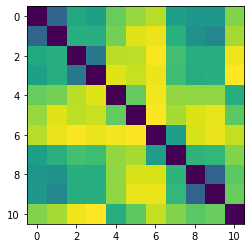

In [12]:
plt.imshow(result)
plt.show()

In [13]:
clus = []
for i in range(len(result)):
    min_elm = 100000000000
    idx_i = -1
    idx_j = -1
    
    for j in range(len(result)):    
        if(min_elm > result[i, j] and result[i, j] != 0):
            min_elm = result[i, j]
            idx_i = i
            idx_j = j
    
    clus.append((min(idx_i, idx_j), max(idx_i, idx_j)))
    
clus = set(clus)

In [14]:
def get_antonyms(word):
    ant = []
    for s in wordnet.synsets(word):
        for l in s.lemmas():
            if l.antonyms():
                ant.append(l.antonyms()[0].name())
                    
    return list(set(ant))

In [15]:
get_antonyms('simple')

['complex', 'compound']

In [16]:
conflicts = []

for item in clus:
    for w1 in data[item[0]].split(' '):
        for w2 in data[item[1]].split(' '):
            if w2 in get_antonyms(w1):
                conflicts.append(item)

In [17]:
conflicts

for item in conflicts:
    print(data[item[0]])
    print(data[item[1]])
    print()

Increasing the complexity of the product recommender should not cause a decreasing download speed
Increasing the capacity of users should not cause decreasing system response time

Increasing the complexity of client service should not cause decreasing maintainability of client service
Increasing the capacity of users should not cause decreasing system response time



In [18]:
for item in clus:
    print(data[item[0]])
    print(data[item[1]])
    print()

The complexity of the client system should be simple
The complexity of the system should be sophisticated

Increasing the complexity of the product recommender should not cause a decreasing download speed
Increasing the capacity of users should not cause decreasing system response time

The color of customer service should be more brightened
The color of the client service should be dark

The system shall provide access to anonymous users for unrestricted functions
The system shall provide privacy to users

Increasing the complexity of client service should not cause decreasing maintainability of client service
Increasing the capacity of users should not cause decreasing system response time

The response time of the system should be high
The capacity of the system should be high



In [19]:
SENT_SIZE = 40

def convert_sent_to_emb(X, word_to_vec):
    data = np.zeros((len(X), SENT_SIZE, len(word_to_vec['word'])))
    
    for i, sent in enumerate(X):
        for j, word in enumerate(sent.split()):
            try:
                data[i, j, :] = word_to_vec[word]
            except:
                pass
            
    return data

In [20]:
ant = pd.read_csv('data/antonyms.txt', delimiter = '\t')
ant['Antonym'] = ant['Antonym'].str.split()

words = ant['Root'].values
ant_list = ant['Antonym'].values

ant_dict = {}
for word, ant_l in zip(words, ant_list):
    ant_dict[word] = ant_l

ant.head()

,Root,Antonym
0,elongated,[stunted]
1,thinskinned,[thickskinned]
2,tactful,[tactless]
3,orphaned,[privileged]
4,laconic,"[glib,, garrulous,, talkative,, gossipy,, chat..."


In [21]:
def sent_to_list(sent1, sent2):
    l1 = sent1.lower().split()
    l2 = sent2.lower().split()
    return l1, l2

def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(set(list1)) + len(set(list2))) - intersection
    return float(intersection) / union

def isNegation(list1, list2, negation_list):
    for word in list1:
        if word in negation_list:
            return True
    
    for word in list2:
        if word in negation_list:
            return True
        
    return False

def get_antonyms(word, ant_dict):
    ant = []
    for s in wordnet.synsets(word):
        for l in s.lemmas():
            if l.antonyms():
                ant.append(l.antonyms()[0].name())
                
    ans = list(set(ant))
    if word in ant_dict:
        ans.extend(ant_dict[word])
        
    return ans

def isAntonym(sent1, sent2):
    for w1 in sent1.split(' '):
        for w2 in sent2.split(' '):
            if w2 in get_antonyms(w1, ant_dict):
                return True
    return False

negation_list = ['No', 'Not','None','No one','Nobody','Nothing','Neither','Nowhere','Never','Hardly','Scarcely','Barely','Doesn’t','Isn’t','Wasn’t','Shouldn’t','Wouldn’t','Couldn’t','Won’t','Can’t','Don’t']
for i in range(len(negation_list)):
    negation_list[i] = negation_list[i].lower().replace("’", "")

In [22]:
print(isAntonym('Increasing the complexity of the product recommender should not cause a decreasing download speed', 'Increasing the capacity of users should not cause decreasing system response time'))
print(isAntonym('The complexity of the client system should be simple', 'The complexity of the system should be sophisticated'))


True
False


In [23]:
cd_model = load_model('contradiction_detection_model.h5')

In [62]:
for item in clus:
    sent1 = data[item[0]]
    sent2 = data[item[1]]
    
    print(sent1)
    print(sent2)
    
    l1, l2 = sent_to_list(sent1, sent2)
    iou = jaccard_similarity(l1, l2)
    neg = isNegation(l1, l2, negation_list)
    isAnt = isAntonym(sent1, sent2)
    
    s1 = convert_sent_to_emb([sent1.lower()], word2vec)
    s2 = convert_sent_to_emb([sent2.lower()], word2vec)
    
    pred = cd_model.predict([s1, s2, np.array([iou, neg, isAnt], dtype = float).reshape(1, 3)])
    print(pred)
    print()

The complexity of the client system should be simple
The complexity of the system should be sophisticated
[[0.14930615]]

Increasing the complexity of the product recommender should not cause a decreasing download speed
Increasing the capacity of users should not cause decreasing system response time
[[0.01108095]]

The color of customer service should be more brightened
The color of the client service should be dark
[[0.21863511]]

The system shall provide access to anonymous users for unrestricted functions
The system shall provide privacy to users
[[0.31115466]]

Increasing the complexity of client service should not cause decreasing maintainability of client service
Increasing the capacity of users should not cause decreasing system response time
[[0.00928357]]

The response time of the system should be high
The capacity of the system should be high
[[0.16124633]]

